In [5]:
import torch
import torch.nn as nn
import torchvision

import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

In [17]:
n_classes = 10
n_epochs = 50
batch_size = 256
lr = 1e-3

In [7]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [18]:
class CNN(nn.Module):
  def __init__(self, n_classes=10):
    super(CNN, self).__init__()
    # BLOCK 1
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(3, 64, 3, stride=1, padding='same'), 
        nn.ReLU()
    )
    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(64, 64, 3, stride=1, padding='same'), 
        nn.ReLU()
    )
    self.conv_layer3 = nn.Sequential(
        nn.Conv2d(64, 64, 3, stride=1, padding='same'), 
        nn.ReLU(), 
        nn.MaxPool2d(2, 2)
    )
    self.res_layer1 = nn.Sequential(
        nn.Conv2d(3, 64, 3, stride=2, padding=1), 
        nn.ReLU()
    )

    # BLOCK 2
    self.conv_layer4 = nn.Sequential(
        nn.Conv2d(64, 128, 3, stride=1, padding='same'),
        nn.ReLU()
    )
    self.conv_layer5 = nn.Sequential(
        nn.Conv2d(128, 128, 3, stride=1, padding='same'),
        nn.ReLU()
    )
    self.conv_layer6 = nn.Sequential(
        nn.Conv2d(128, 128, 3, stride=1, padding='same'), 
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.res_layer2 = nn.Sequential(
        nn.Conv2d(64, 128, 3, stride=2, padding=1), 
        nn.ReLU()
    )

    # BLOCK 3
    self.conv_layer7 = nn.Sequential(
        nn.Conv2d(128, 256, 3, stride=1, padding='same'), 
        nn.ReLU()
    )
    self.conv_layer8 = nn.Sequential(
        nn.Conv2d(256, 256, 3, stride=1, padding='same'), 
        nn.ReLU()
    )
    self.conv_layer9 = nn.Sequential(
          nn.Conv2d(256, 256, 3, stride=1, padding='same'), 
          nn.ReLU(), 
          nn.MaxPool2d(2, 2)
    )
    self.res_layer3 = nn.Sequential(
        nn.Conv2d(128, 256, 3, stride=2, padding=1), 
        nn.ReLU()
    )

    # BLOCK 4
    self.conv_layer10 = nn.Sequential(
        nn.Conv2d(256, 512, 3, stride=1, padding='same'),
        nn.ReLU(),
    )
    self.conv_layer11 = nn.Sequential(
        nn.Conv2d(512, 512, 3, stride=1, padding='same'),
        nn.ReLU(),
    )
    self.conv_layer12 = nn.Sequential(
        nn.Conv2d(512, 512, 3, stride=1, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.res_layer4 = nn.Sequential(
        nn.Conv2d(256, 512, 3, stride=2, padding=1),
        nn.ReLU(),
    )

    # BLOCK 5
    self.flatten = nn.Flatten()
    self.fc_layer1 = nn.Sequential(
        nn.Linear(512*2*2, 512), 
        nn.ReLU()
    )
    self.fc_layer2 = nn.Linear(512, n_classes)


  def forward(self, x):
    previous_input = x
    x = self.conv_layer1(x)
    x = self.conv_layer2(x)
    x = self.conv_layer3(x)
    res = self.res_layer1(previous_input)
    x = x + res

    previous_input = x
    x = self.conv_layer4(x)
    x = self.conv_layer5(x)
    x = self.conv_layer6(x)
    res = self.res_layer2(previous_input)
    x = x + res

    previous_input = x
    x = self.conv_layer7(x)
    x = self.conv_layer8(x)
    x = self.conv_layer9(x)
    res = self.res_layer3(previous_input)
    x = x + res

    previous_input = x
    x = self.conv_layer10(x)
    x = self.conv_layer11(x)
    x = self.conv_layer12(x)
    res = self.res_layer4(previous_input)
    x = x + res

    x = self.flatten(x)
    x = self.fc_layer1(x)
    outputs = self.fc_layer2(x)

    return outputs

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('USING {} FOR TRAINING THE MODEL'.format(device))
model = CNN(n_classes)
model.to(device)

USING cuda FOR TRAINING THE MODEL


CNN(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
  )
  (conv_layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
  )
  (conv_layer3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res_layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (conv_layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
  )
  (conv_layer5): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
  )
  (conv_layer6): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)  

In [20]:
training_steps = len(train_dataloader)
val_steps = len(val_dataloader)

training_losses = []
val_losses = []
val_accs = []

In [21]:
print('START TRAINING...\n')
for epoch in range(n_epochs):
    total_training_loss = 0
    model.train()
    for idx, (X_train, y_train) in enumerate(train_dataloader):
        X_train = X_train.to(device)
        y_train = y_train.to(device)

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        total_training_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    training_loss = total_training_loss / training_steps
    training_losses.append(training_loss)

    print(f'EPOCH [{epoch+1}/{n_epochs}], TRAINING LOSS: {training_loss:.3f}')

    with torch.no_grad():
        model.eval()
        n_correct_preds = 0
        n_val_samples = 0
        total_val_loss = 0
        for idx, (X_val, y_val) in enumerate(val_dataloader):
            X_val = X_val.to(device)
            y_val = y_val.to(device)

            y_pred = model(X_val)
            loss = criterion(y_pred, y_val)
            total_val_loss += loss.item()

            y_pred_max, y_pred_max_idx = torch.max(y_pred, 1)
            n_val_samples += y_pred.size(0)
            n_correct_preds += (y_val == y_pred_max_idx).sum().item()

        val_acc = n_correct_preds / n_val_samples
        val_loss = total_val_loss / val_steps
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'VAL LOSS: {val_loss:.3f}, VAL ACCURACY: {val_acc:.3f}\n')

print('TRAINING COMPLETED!!!!!')

START TRAINING...

EPOCH [1/50], TRAINING LOSS: 1.744
VAL LOSS: 1.390, VAL ACCURACY: 0.496

EPOCH [2/50], TRAINING LOSS: 1.278
VAL LOSS: 1.158, VAL ACCURACY: 0.587

EPOCH [3/50], TRAINING LOSS: 1.015
VAL LOSS: 0.832, VAL ACCURACY: 0.703

EPOCH [4/50], TRAINING LOSS: 0.825
VAL LOSS: 0.724, VAL ACCURACY: 0.746

EPOCH [5/50], TRAINING LOSS: 0.673
VAL LOSS: 0.548, VAL ACCURACY: 0.812

EPOCH [6/50], TRAINING LOSS: 0.539
VAL LOSS: 0.403, VAL ACCURACY: 0.865

EPOCH [7/50], TRAINING LOSS: 0.415
VAL LOSS: 0.318, VAL ACCURACY: 0.891

EPOCH [8/50], TRAINING LOSS: 0.315
VAL LOSS: 0.215, VAL ACCURACY: 0.929

EPOCH [9/50], TRAINING LOSS: 0.215
VAL LOSS: 0.138, VAL ACCURACY: 0.956

EPOCH [10/50], TRAINING LOSS: 0.155
VAL LOSS: 0.090, VAL ACCURACY: 0.972

EPOCH [11/50], TRAINING LOSS: 0.110
VAL LOSS: 0.074, VAL ACCURACY: 0.976

EPOCH [12/50], TRAINING LOSS: 0.097
VAL LOSS: 0.118, VAL ACCURACY: 0.959

EPOCH [13/50], TRAINING LOSS: 0.077
VAL LOSS: 0.086, VAL ACCURACY: 0.970

EPOCH [14/50], TRAINING LOSS

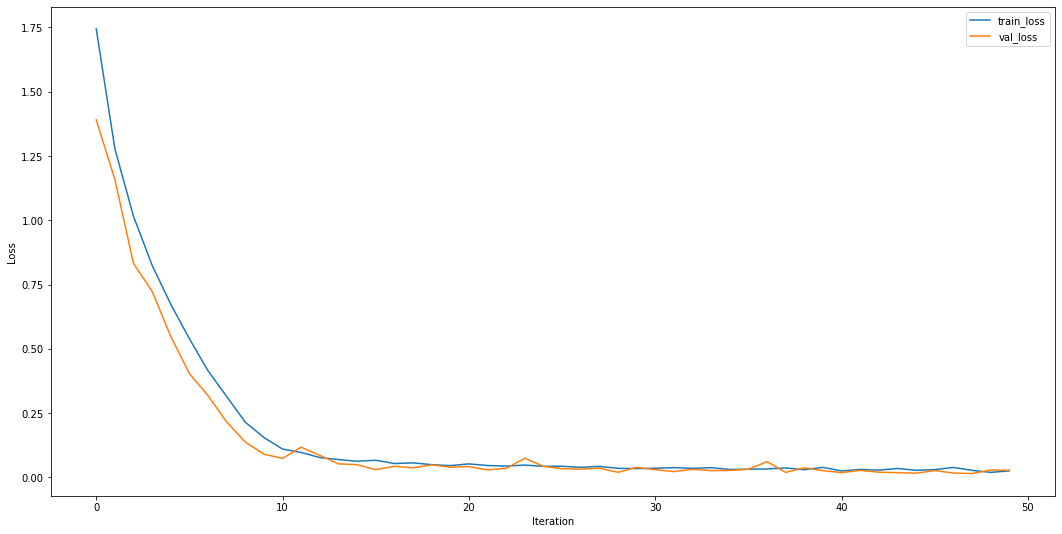

In [22]:
plt.figure(figsize=(18, 9))
plt.plot(training_losses, label = "train_loss")
plt.plot(val_losses, label = "val_loss")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()  